### 1. Imports

In [1]:
# Import libraries
import gym
import numpy as np
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO2, A2C
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\users\patri\documents\github\reinforcementlearninginventorymanagement\venv_37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 1
max_inventory_amount_regional_warehouses = 20
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = 1
simulation_length = 30
lead_time = 3

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time)

Simulation created with the following parameters:
------------------------------------------------------------
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 6 ; Demand: 1 ; Lost sales: 0
------------------------------------------------------------


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO2(MlpPolicy, env, verbose=1)
ppo_model.learn(total_timesteps=30000)

Wrapping the env in a DummyVecEnv.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



---------------------------------------
| approxkl           | 1.0051489e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.0471        |
| fps                | 432            |
| n_updates          | 1              |
| policy_entropy     | 0.69313717     |
| policy_loss        | -0.00096822134 |
| serial_timesteps   | 128            |
| time_elapsed       | 0              |
| total_timesteps    | 128            |
| value_loss         | 0.4052229      |
---------------------------------------
---------------------------------------
| approxkl           | 4.5009756e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.0396        |
| fps                | 798            |
| n_upd

--------------------------------------
| approxkl           | 9.340959e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.277         |
| fps                | 1504          |
| n_updates          | 9             |
| policy_entropy     | 0.69225115    |
| policy_loss        | -0.0005406387 |
| serial_timesteps   | 1152          |
| time_elapsed       | 0.982         |
| total_timesteps    | 1152          |
| value_loss         | 0.19521196    |
--------------------------------------
---------------------------------------
| approxkl           | 3.448541e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.347          |
| fps                | 1523           |
| n_updates          | 10             |
| policy_entropy     | 0.6917986      |
| policy_loss        | -0.00090096827 |
| serial_timesteps   | 1280           |
| time_elapsed       | 1.07           |
| total_timesteps    | 1280           |
| value_loss         | 0.14053999     |
-------------

--------------------------------------
| approxkl           | 0.00011083018 |
| clipfrac           | 0.0           |
| explained_variance | 0.465         |
| fps                | 1539          |
| n_updates          | 26            |
| policy_entropy     | 0.6778137     |
| policy_loss        | -0.0015931545 |
| serial_timesteps   | 3328          |
| time_elapsed       | 2.44          |
| total_timesteps    | 3328          |
| value_loss         | 0.15899588    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00033021183 |
| clipfrac           | 0.0           |
| explained_variance | 0.397         |
| fps                | 1510          |
| n_updates          | 27            |
| policy_entropy     | 0.6736777     |
| policy_loss        | -0.005797965  |
| serial_timesteps   | 3456          |
| time_elapsed       | 2.53          |
| total_timesteps    | 3456          |
| value_loss         | 0.4108623     |
-------------------------

---------------------------------------
| approxkl           | 0.000107046595 |
| clipfrac           | 0.0            |
| explained_variance | 0.342          |
| fps                | 1550           |
| n_updates          | 43             |
| policy_entropy     | 0.5513215      |
| policy_loss        | -0.0023862142  |
| serial_timesteps   | 5504           |
| time_elapsed       | 3.96           |
| total_timesteps    | 5504           |
| value_loss         | 0.53315574     |
---------------------------------------
--------------------------------------
| approxkl           | 0.00088959245 |
| clipfrac           | 0.0           |
| explained_variance | 0.253         |
| fps                | 1542          |
| n_updates          | 44            |
| policy_entropy     | 0.5350745     |
| policy_loss        | -0.00872702   |
| serial_timesteps   | 5632          |
| time_elapsed       | 4.05          |
| total_timesteps    | 5632          |
| value_loss         | 0.631848      |
------------

---------------------------------------
| approxkl           | 4.347711e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.0972         |
| fps                | 1558           |
| n_updates          | 60             |
| policy_entropy     | 0.33273235     |
| policy_loss        | -0.00092664675 |
| serial_timesteps   | 7680           |
| time_elapsed       | 5.46           |
| total_timesteps    | 7680           |
| value_loss         | 13.984537      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00016267528 |
| clipfrac           | 0.0           |
| explained_variance | 0.112         |
| fps                | 1542          |
| n_updates          | 61            |
| policy_entropy     | 0.2969904     |
| policy_loss        | -0.0033292978 |
| serial_timesteps   | 7808          |
| time_elapsed       | 5.55          |
| total_timesteps    | 7808          |
| value_loss         | 5.484487      |
------------

--------------------------------------
| approxkl           | 0.0003280247  |
| clipfrac           | 0.0           |
| explained_variance | 0.129         |
| fps                | 1566          |
| n_updates          | 77            |
| policy_entropy     | 0.21795222    |
| policy_loss        | -0.0030257895 |
| serial_timesteps   | 9856          |
| time_elapsed       | 7.14          |
| total_timesteps    | 9856          |
| value_loss         | 1.7945358     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00079047505 |
| clipfrac           | 0.01171875    |
| explained_variance | 0.113         |
| fps                | 1556          |
| n_updates          | 78            |
| policy_entropy     | 0.21210413    |
| policy_loss        | -0.00571201   |
| serial_timesteps   | 9984          |
| time_elapsed       | 7.23          |
| total_timesteps    | 9984          |
| value_loss         | 2.1766467     |
-------------------------

---------------------------------------
| approxkl           | 1.0319113e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0569         |
| fps                | 1109           |
| n_updates          | 94             |
| policy_entropy     | 0.15713024     |
| policy_loss        | -0.00021613814 |
| serial_timesteps   | 12032          |
| time_elapsed       | 8.95           |
| total_timesteps    | 12032          |
| value_loss         | 2.9042695      |
---------------------------------------
---------------------------------------
| approxkl           | 9.763158e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.0566         |
| fps                | 1238           |
| n_updates          | 95             |
| policy_entropy     | 0.15899234     |
| policy_loss        | -0.00093783485 |
| serial_timesteps   | 12160          |
| time_elapsed       | 9.07           |
| total_timesteps    | 12160          |
| value_loss         | 4.4700456      |


--------------------------------------
| approxkl           | 6.490551e-07  |
| clipfrac           | 0.0           |
| explained_variance | 0.0202        |
| fps                | 881           |
| n_updates          | 110           |
| policy_entropy     | 0.12528089    |
| policy_loss        | -7.539289e-06 |
| serial_timesteps   | 14080         |
| time_elapsed       | 10.6          |
| total_timesteps    | 14080         |
| value_loss         | 3.9101841     |
--------------------------------------
---------------------------------------
| approxkl           | 3.2550364e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.000437       |
| fps                | 1392           |
| n_updates          | 111            |
| policy_entropy     | 0.12262728     |
| policy_loss        | -0.00066968775 |
| serial_timesteps   | 14208          |
| time_elapsed       | 10.7           |
| total_timesteps    | 14208          |
| value_loss         | 3.4181101      |
-------------

--------------------------------------
| approxkl           | 5.6390683e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0634        |
| fps                | 1495          |
| n_updates          | 126           |
| policy_entropy     | 0.09503669    |
| policy_loss        | -0.0009520042 |
| serial_timesteps   | 16128         |
| time_elapsed       | 12.2          |
| total_timesteps    | 16128         |
| value_loss         | 3.8268442     |
--------------------------------------
--------------------------------------
| approxkl           | 8.807982e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.0231        |
| fps                | 1071          |
| n_updates          | 127           |
| policy_entropy     | 0.09259028    |
| policy_loss        | -0.0012275046 |
| serial_timesteps   | 16256         |
| time_elapsed       | 12.3          |
| total_timesteps    | 16256         |
| value_loss         | 4.1723924     |
-------------------------

---------------------------------------
| approxkl           | 3.499682e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.0707         |
| fps                | 1313           |
| n_updates          | 143            |
| policy_entropy     | 0.059740834    |
| policy_loss        | -0.00014042959 |
| serial_timesteps   | 18304          |
| time_elapsed       | 13.7           |
| total_timesteps    | 18304          |
| value_loss         | 4.995248       |
---------------------------------------
-------------------------------------
| approxkl           | 5.591024e-06 |
| clipfrac           | 0.0          |
| explained_variance | 0.0323       |
| fps                | 1136         |
| n_updates          | 144          |
| policy_entropy     | 0.05501007   |
| policy_loss        | -4.63092e-05 |
| serial_timesteps   | 18432        |
| time_elapsed       | 13.8         |
| total_timesteps    | 18432        |
| value_loss         | 4.3792048    |
------------------------

---------------------------------------
| approxkl           | 5.1356838e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.054          |
| fps                | 1525           |
| n_updates          | 159            |
| policy_entropy     | 0.037161566    |
| policy_loss        | -0.00028137595 |
| serial_timesteps   | 20352          |
| time_elapsed       | 15.2           |
| total_timesteps    | 20352          |
| value_loss         | 4.697708       |
---------------------------------------
--------------------------------------
| approxkl           | 2.652046e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.0485        |
| fps                | 1534          |
| n_updates          | 160           |
| policy_entropy     | 0.035022907   |
| policy_loss        | 2.4038367e-05 |
| serial_timesteps   | 20480         |
| time_elapsed       | 15.3          |
| total_timesteps    | 20480         |
| value_loss         | 4.8896236     |
------------

--------------------------------------
| approxkl           | 5.3023943e-11 |
| clipfrac           | 0.0           |
| explained_variance | 0.0502        |
| fps                | 484           |
| n_updates          | 176           |
| policy_entropy     | 0.020284267   |
| policy_loss        | 1.0046642e-07 |
| serial_timesteps   | 22528         |
| time_elapsed       | 18.7          |
| total_timesteps    | 22528         |
| value_loss         | 5.332265      |
--------------------------------------
---------------------------------------
| approxkl           | 3.035176e-11   |
| clipfrac           | 0.0            |
| explained_variance | 0.0624         |
| fps                | 479            |
| n_updates          | 177            |
| policy_entropy     | 0.020609131    |
| policy_loss        | -2.1967571e-07 |
| serial_timesteps   | 22656          |
| time_elapsed       | 19             |
| total_timesteps    | 22656          |
| value_loss         | 4.8757176      |
-------------

---------------------------------------
| approxkl           | 2.7003854e-11  |
| clipfrac           | 0.0            |
| explained_variance | 0.0567         |
| fps                | 505            |
| n_updates          | 193            |
| policy_entropy     | 0.020359322    |
| policy_loss        | -3.8126018e-08 |
| serial_timesteps   | 24704          |
| time_elapsed       | 23.1           |
| total_timesteps    | 24704          |
| value_loss         | 4.6609282      |
---------------------------------------
----------------------------------------
| approxkl           | 3.0362917e-11   |
| clipfrac           | 0.0             |
| explained_variance | 0.0573          |
| fps                | 512             |
| n_updates          | 194             |
| policy_entropy     | 0.020623669     |
| policy_loss        | -1.17346644e-07 |
| serial_timesteps   | 24832           |
| time_elapsed       | 23.4            |
| total_timesteps    | 24832           |
| value_loss         | 5.1259

--------------------------------------
| approxkl           | 3.4915824e-11 |
| clipfrac           | 0.0           |
| explained_variance | 0.0579        |
| fps                | 495           |
| n_updates          | 209           |
| policy_entropy     | 0.014678126   |
| policy_loss        | 7.3341653e-09 |
| serial_timesteps   | 26752         |
| time_elapsed       | 26.8          |
| total_timesteps    | 26752         |
| value_loss         | 4.977429      |
--------------------------------------
--------------------------------------
| approxkl           | 5.4915945e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0987        |
| fps                | 518           |
| n_updates          | 210           |
| policy_entropy     | 0.013317662   |
| policy_loss        | -0.0007165424 |
| serial_timesteps   | 26880         |
| time_elapsed       | 27            |
| total_timesteps    | 26880         |
| value_loss         | 5.4836326     |
-------------------------

---------------------------------------
| approxkl           | 1.5981242e-11  |
| clipfrac           | 0.0            |
| explained_variance | 0.065          |
| fps                | 695            |
| n_updates          | 226            |
| policy_entropy     | 0.010673025    |
| policy_loss        | -2.4912879e-08 |
| serial_timesteps   | 28928          |
| time_elapsed       | 30.9           |
| total_timesteps    | 28928          |
| value_loss         | 4.685814       |
---------------------------------------
---------------------------------------
| approxkl           | 1.26935415e-11 |
| clipfrac           | 0.0            |
| explained_variance | 0.0599         |
| fps                | 694            |
| n_updates          | 227            |
| policy_entropy     | 0.010981731    |
| policy_loss        | 7.7765435e-08  |
| serial_timesteps   | 29056          |
| time_elapsed       | 31             |
| total_timesteps    | 29056          |
| value_loss         | 4.6977634      |


###### Learning Curve

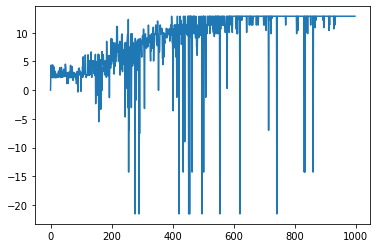

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    inventory_levels.append(info["Inventory:"])
    
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | Inventory: 5 | Action: 0 | Reward: 0.17 | 
Steps left: 28 | Inventory: 4 | Action: 0 | Reward: 0.2 | 
Steps left: 27 | Inventory: 3 | Action: 0 | Reward: 0.25 | 
Steps left: 26 | Inventory: 2 | Action: 1 | Reward: 0.33 | 
Steps left: 25 | Inventory: 1 | Action: 0 | Reward: 0.5 | 
Steps left: 24 | Inventory: 0 | Action: 0 | Reward: 1 | 
Steps left: 23 | Inventory: 4 | Action: 0 | Reward: 0.2 | 
Steps left: 22 | Inventory: 3 | Action: 0 | Reward: 0.25 | 
Steps left: 21 | Inventory: 2 | Action: 1 | Reward: 0.33 | 
Steps left: 20 | Inventory: 1 | Action: 0 | Reward: 0.5 | 
Steps left: 19 | Inventory: 0 | Action: 0 | Reward: 1 | 
Steps left: 18 | Inventory: 4 | Action: 0 | Reward: 0.2 | 
Steps left: 17 | Inventory: 3 | Action: 0 | Reward: 0.25 | 
Steps left: 16 | Inventory: 2 | Action: 1 | Reward: 0.33 | 
Steps left: 15 | Inventory: 1 | Action: 0 | Reward: 0.5 | 
Steps left: 14 | Inventory: 0 | Action: 0 | Reward: 1 | 
Steps left: 13 | Inventory: 4 | Action: 0 | Reward: 0.2

###### Inventory level graph

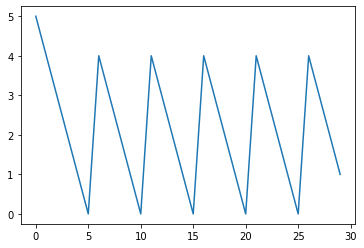

In [8]:
plt.plot(inventory_levels)
plt.show()